In [40]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [41]:
weight = 0.7
bias = 0.3

start=0
end=1
step=0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = X*weight + bias

In [42]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
X_train.size()

torch.Size([40, 1])

In [46]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))

    #train data
    plt.scatter(train_data, train_labels, c="b", s=7, label="Training data")

    #test data
    plt.scatter(test_data, test_labels, c="r", s=7, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size": 14});

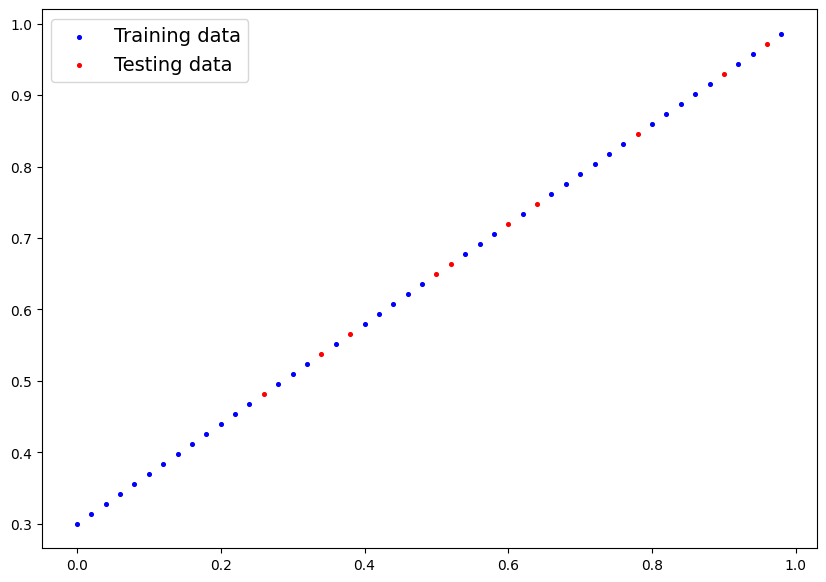

In [47]:
plot_predictions()

In [48]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float,
                                                requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,
                                                dtype=torch.float,
                                                requires_grad=True))
    
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [49]:
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [50]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [51]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])


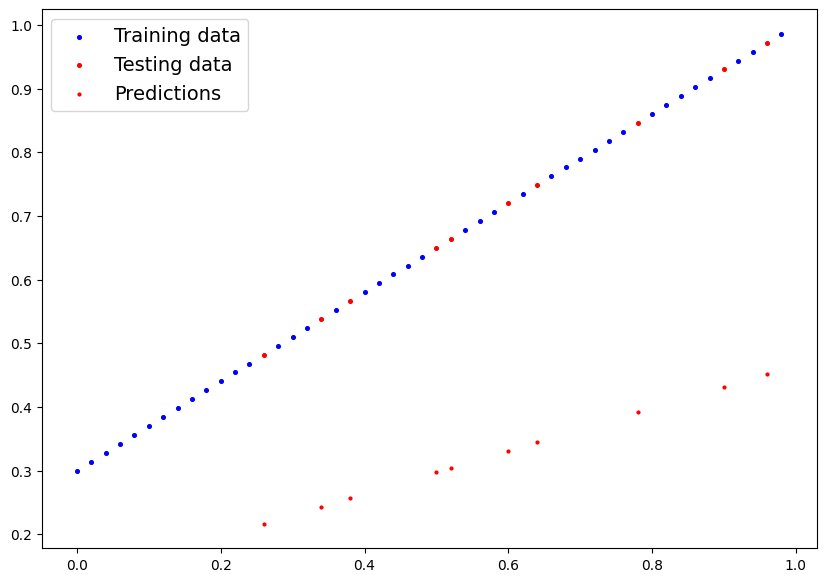

In [52]:
plot_predictions(predictions=y_preds)

In [53]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

In [54]:
torch.manual_seed(42)

epochs=100

train_loss_values = []
test_loss_values = []
epoch_count= []
for epoch in range(epochs):
    #train model
    model_0.train()

    #1 forward pass
    y_pred = model_0(X_train)

    #2 calculate loss
    loss = loss_fn(y_pred,y_train)

    #3 zero grad 
    optimizer.zero_grad()

    #4 backpropagate
    loss.backward()

    #5
    optimizer.step()

    #test
    #put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        #1 forward pass 
        test_pred = model_0(X_test)

        #2 calculate loss 
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch%10==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.3403112292289734 | MAE Test Loss: 0.3720795214176178 
Epoch: 10 | MAE Train Loss: 0.21864214539527893 | MAE Test Loss: 0.24470803141593933 
Epoch: 20 | MAE Train Loss: 0.10375527292490005 | MAE Test Loss: 0.12293665111064911 
Epoch: 30 | MAE Train Loss: 0.06399796158075333 | MAE Test Loss: 0.06073010712862015 
Epoch: 40 | MAE Train Loss: 0.05161098763346672 | MAE Test Loss: 0.04132990911602974 
Epoch: 50 | MAE Train Loss: 0.04540504142642021 | MAE Test Loss: 0.03398851305246353 
Epoch: 60 | MAE Train Loss: 0.039804037660360336 | MAE Test Loss: 0.029580067843198776 
Epoch: 70 | MAE Train Loss: 0.034203045070171356 | MAE Test Loss: 0.025171661749482155 
Epoch: 80 | MAE Train Loss: 0.028602054342627525 | MAE Test Loss: 0.020763229578733444 
Epoch: 90 | MAE Train Loss: 0.02300105430185795 | MAE Test Loss: 0.016354799270629883 


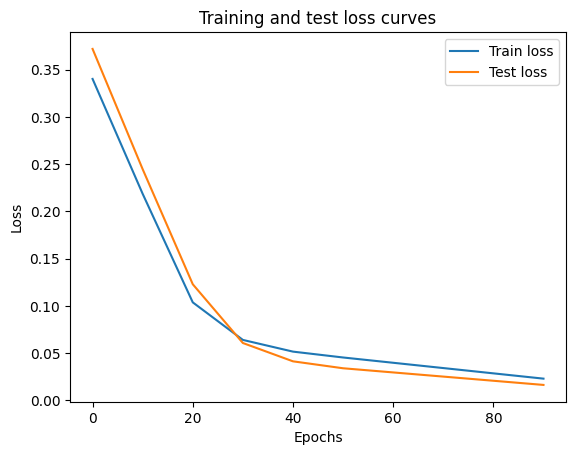

In [55]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [56]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6344]), 'bias': tensor([0.3333])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


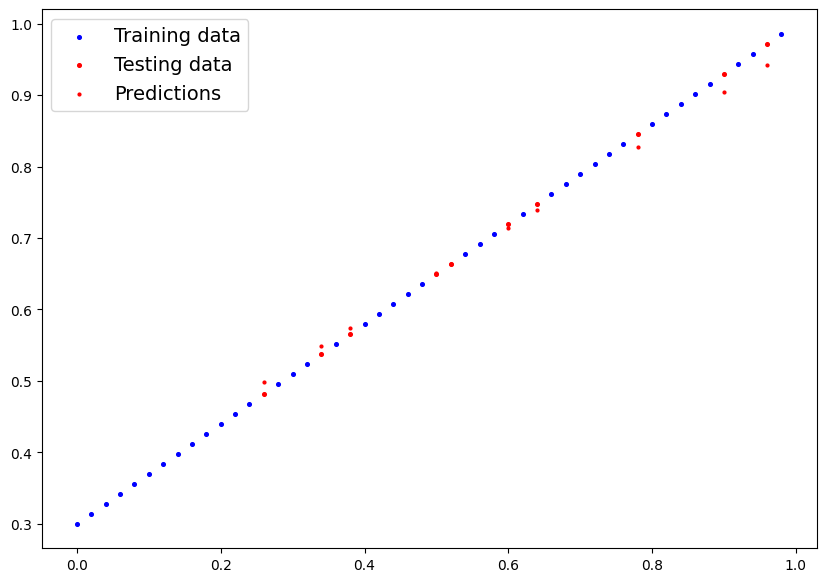

In [57]:
with torch.inference_mode():
    y_pred = model_0(X_test)
plot_predictions(predictions=y_pred)